The purpose of this exercise is to perform very simple calculations to increment longitude values in order to plot
persons in the same city on an interactive map. Plotly.express does not allow multiple points for the same latitude and longitude, so if we want to display mutiple people living in the same city, the coordinates need to be slightly different, but still close enough to place them in the correct location. This program will iterate through the Longitude series, look for duplicate values, increment the values and enter the new list into the original dataframe and delete the previous one.

The inspiration for this project came about because of a work project I volunteered for. I was in charge of creating an employee map, which would be used to encourage in person engagement, and I wanted to do it using Plotly. It should be said that my company primarily uses SAS and R, but I am more proficient in Python, hence why I wanted to try using Plotly. I discussed this with my manager and she was onboard, however she asked,'What happens if we have multiple people in the same city? Would it show one point with a list of names, or multiple points showing each name?'When I created a fake dataset, much like the one you'll see in this program, it only showed one point and one name. I scoured the web looking for a way to circumvent this issue, but I didn't find much. Since I know that different locations within the same city will have very similar lat and long coordinates, I decided to try writing a program that would create a slight variance in the lat/long coords, which should cause enough of a difference to create separate points, but not too much of a difference that would move it too far from the actual city.

In [1]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [2]:
import csv
import pandas as pd
import plotly.express as px

In [3]:
csv_list = []
with open('yas.csv','r') as f:
    file = csv.reader(f)
    for line in file:
        csv_list.append(line)

In [4]:
data = csv_list[1:]

In [5]:
df = pd.DataFrame(data,columns=['Name', 'City','State','Lat','Lon'])

In [6]:
df['LAT'] = df['Lat'].astype(float)
df['LON'] = df['Lon'].astype(float)

In [7]:
upd_df = df.drop(columns=['Lat','Lon'])

In [8]:
upd_df

,Name,City,State,LAT,LON
0,Janet Robertson,Philadelphia,PA,39.952394,-75.183966
1,Lisa Gray,Newark,NJ,40.734896,-74.170731
2,Sam Smith,Sacramento,CA,38.583091,-121.495096
3,Robert Downing,Cleveland,OH,41.499117,-81.697698
4,Angela Stevens,Boston,MA,42.365645,-71.076105
5,Jessie Clark,Durham,NC,35.996159,-78.894545
6,Steven Jones,Oakland,CA,37.805277,-122.276527
7,Ryan Clark,Oakland,CA,37.805277,-122.276527
8,Sharon Hill,Oakland,CA,37.805277,-122.276527
9,Emmit Black,Oakland,CA,37.805277,-122.276527


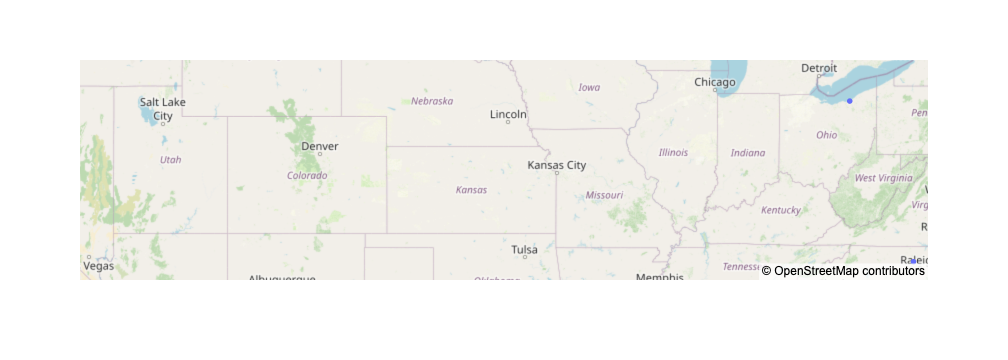

In [10]:
#Lets map this to see how the points show up

attempt1 = px.scatter_mapbox(upd_df, lat ='LAT', lon= 'LON',zoom=4,hover_name='Name')
attempt1.update_layout(mapbox_style="open-street-map")

attempt1.show()

As you can see, there's only 1 point for Oakland and Newark, which shows the last instance only.

In [11]:
#create a list of the longitude values from the dataframe

lon = []
for i in upd_df['LON']:
    lon.append(i)

In [12]:
#we'll isolate this series, do some manipulation, and the insert it back into the df
lon

[-75.1839663338271,
 -74.1707307241491,
 -121.4950960992,
 -81.6976984640103,
 -71.0761046574631,
 -78.8945451903273,
 -122.276527318087,
 -122.276527318087,
 -122.276527318087,
 -122.276527318087,
 -74.1707307241491]

In [13]:
for i in range(len(lon)):
    lon[i]= float(lon[i])

In [14]:
from collections import Counter

In [15]:
#look for duplicates
val_counts = Counter(lon)

In [16]:
val_counts
#We already knew this by looking in the original dataframe, but here we can see the count for each unique value.
#Obviously if any value is greater than one, then it is a duplicate

Counter({-75.1839663338271: 1,
         -74.1707307241491: 2,
         -121.4950960992: 1,
         -81.6976984640103: 1,
         -71.0761046574631: 1,
         -78.8945451903273: 1,
         -122.276527318087: 4})

In [17]:
dups = []
for value,count in val_counts.items():
    if count > 1:
        dups.append(value)
dups

[-74.1707307241491, -122.276527318087]

In [18]:
for index, item in enumerate(lon): #original list
    for position, value in enumerate(dups): #duplicate items
        if item == value: #value in original is equal to value in dup list
            print(index, item) #print index and item as they exist in orginal list

1 -74.1707307241491
6 -122.276527318087
7 -122.276527318087
8 -122.276527318087
9 -122.276527318087
10 -74.1707307241491


In [19]:
#Starting with -74, since there's only two in this list, we can just worry about the second occurence

for index in range(len(lon)):
    if index==10:
            lon[index] = lon[1] - 0.055

In [20]:
lon #change made

[-75.1839663338271,
 -74.1707307241491,
 -121.4950960992,
 -81.6976984640103,
 -71.0761046574631,
 -78.8945451903273,
 -122.276527318087,
 -122.276527318087,
 -122.276527318087,
 -122.276527318087,
 -74.2257307241491]

In [21]:
for index in range(len(lon)):
    if index > 6 and index < 10:
            lon[index] = lon[index-1] - 0.010

In [22]:
lon

[-75.1839663338271,
 -74.1707307241491,
 -121.4950960992,
 -81.6976984640103,
 -71.0761046574631,
 -78.8945451903273,
 -122.276527318087,
 -122.28652731808701,
 -122.29652731808702,
 -122.30652731808702,
 -74.2257307241491]

In [23]:
upd_df['LONG']=[i for i in lon] #now the coordinates are slightly different so they will show up on plotly.

In [24]:
final = upd_df.drop(columns='LON')

In [25]:
final

,Name,City,State,LAT,LONG
0,Janet Robertson,Philadelphia,PA,39.952394,-75.183966
1,Lisa Gray,Newark,NJ,40.734896,-74.170731
2,Sam Smith,Sacramento,CA,38.583091,-121.495096
3,Robert Downing,Cleveland,OH,41.499117,-81.697698
4,Angela Stevens,Boston,MA,42.365645,-71.076105
5,Jessie Clark,Durham,NC,35.996159,-78.894545
6,Steven Jones,Oakland,CA,37.805277,-122.276527
7,Ryan Clark,Oakland,CA,37.805277,-122.286527
8,Sharon Hill,Oakland,CA,37.805277,-122.296527
9,Emmit Black,Oakland,CA,37.805277,-122.306527


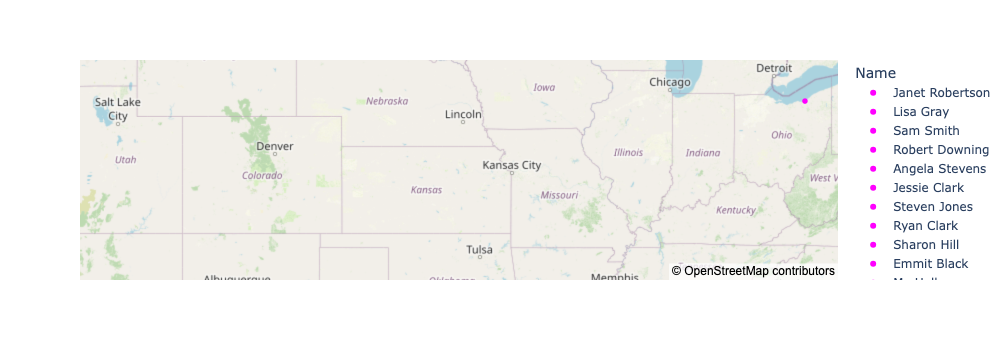

In [26]:
fig = px.scatter_mapbox(final, lat='LAT',lon='LONG',
                        hover_data={'City':True,'LAT':False,'Name':True,'LONG':False},
                                                       color='Name',
                        color_discrete_sequence=["fuchsia"],zoom=4)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In this map, we can see that just by slightly changing the longitude, everyone shows up!